In [1]:
def get_metrics(input_file):
    print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics=[]
    split_title = input_file.split("_")
#     print(split_title)
    metrics.extend([float(split_title[5]), float(split_title[6])])    
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[0]][split_title[4]].append(metrics)

In [2]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(lambda: defaultdict(list))
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

input file:  stack19_ubbm3d_summary_1_3.5_0.3_500_half.txt
input file:  stack16_ubbm3d_summary_1_3.5_0.3_2000_half.txt
input file:  stack16_ubbm3d_summary_1_3.5_0.50_1500_half.txt
input file:  stack20_ubbm3d_summary_1_4.0_0.4_0_half.txt
input file:  stack20_ubbm3d_summary_1_3.5_0.02_1500_half.txt
input file:  stack20_ubbm3d_summary_1_3.5_0.02_0_half.txt
input file:  stack16_ubbm3d_summary_1_4.0_0.3_500_half.txt
input file:  stack17_ubbm3d_summary_1_4.5_0.1_0_half.txt
input file:  stack20_ubbm3d_summary_1_4.5_0.07_1000_half.txt
input file:  stack18_ubbm3d_summary_1_4.0_0.2_1500_half.txt
input file:  stack20_ubbm3d_summary_1_4.0_0.1_1500_half.txt
input file:  stack17_ubbm3d_summary_1_4.0_0.07_1000_half.txt
input file:  stack17_ubbm3d_summary_1_4.5_0.4_1500_half.txt
input file:  stack20_ubbm3d_summary_1_4.5_0.07_1500_half.txt
input file:  stack16_ubbm3d_summary_1_3.5_0.50_0_half.txt
input file:  stack17_ubbm3d_summary_1_4.0_0.02_1500_half.txt
input file:  stack17_ubbm3d_summary_1_4.5_0.3_

input file:  stack20_ubbm3d_summary_1_3.5_0.60_1500_half.txt
input file:  stack17_ubbm3d_summary_1_4.0_0.4_0_half.txt
input file:  stack18_ubbm3d_summary_1_4.5_0.60_1000_half.txt
input file:  stack19_ubbm3d_summary_1_4.5_0.4_1000_half.txt
input file:  stack18_ubbm3d_summary_1_4.0_0.60_1500_half.txt
input file:  stack17_ubbm3d_summary_1_4.0_0.2_0_half.txt
input file:  stack18_ubbm3d_summary_1_4.0_0.50_1500_half.txt
input file:  stack19_ubbm3d_summary_1_4.5_0.05_0_half.txt
input file:  stack17_ubbm3d_summary_1_4.5_0.50_1000_half.txt
input file:  stack18_ubbm3d_summary_1_4.0_0_2000_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_0.45_0_half.txt
input file:  stack20_ubbm3d_summary_1_4.5_0_500_half.txt
input file:  stack16_ubbm3d_summary_1_3.5_0_0_half.txt
input file:  stack17_ubbm3d_summary_1_4.5_0.4_500_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_0.2_0_half.txt
input file:  stack18_ubbm3d_summary_1_3.5_0.50_1000_half.txt
input file:  stack16_ubbm3d_summary_1_4.5_0.4_1500_half.tx

In [3]:
all_metrics

defaultdict(<function __main__.<lambda>()>,
            {'stack19': defaultdict(list,
                         {'3.5': [[0.3, 500.0, 19539.21, 0.00918, 5.5],
                           [0.07, 500.0, 19538.49, 0.00919, 5.5],
                           [0.05, 2000.0, 19542.5, 0.00884, 5.6],
                           [0.07, 2000.0, 19542.56, 0.00884, 5.6],
                           [0.1, 500.0, 19538.55, 0.00919, 5.5],
                           [0.0, 1500.0, 19565.79, 0.00974, 5.6],
                           [0.0, 2000.0, 19564.67, 0.00972, 5.6],
                           [0.1, 0.0, 19560.34, 0.00873, 5.5],
                           [0.55, 2000.0, 19538.83, 0.00894, 5.6],
                           [0.4, 2000.0, 19537.85, 0.00889, 5.6],
                           [0.2, 1500.0, 19550.3, 0.00892, 5.6],
                           [0.3, 0.0, 19561.02, 0.00872, 5.5],
                           [0.02, 2000.0, 19542.45, 0.00884, 5.6],
                           [0.2, 1000.0, 19552.22, 0.00

getting interpolation type with stack19
getting interpolation stack 3.5
[0.0, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6]
[0.0, 500.0, 1000.0, 1500.0, 2000.0]
[[0.000000e+00 1.500000e+03 1.956579e+04 9.740000e-03 5.600000e+00]
 [0.000000e+00 2.000000e+03 1.956467e+04 9.720000e-03 5.600000e+00]
 [0.000000e+00 5.000000e+02 1.956485e+04 9.760000e-03 5.400000e+00]
 [0.000000e+00 1.000000e+03 1.956596e+04 9.790000e-03 5.400000e+00]
 [0.000000e+00 0.000000e+00 1.956644e+04 9.200000e-03 5.500000e+00]]
[[2.000000e-02 2.000000e+03 1.954245e+04 8.840000e-03 5.600000e+00]
 [2.000000e-02 5.000000e+02 1.953844e+04 9.190000e-03 5.500000e+00]
 [2.000000e-02 1.500000e+03 1.954332e+04 8.910000e-03 5.600000e+00]
 [2.000000e-02 0.000000e+00 1.956065e+04 8.690000e-03 5.500000e+00]
 [2.000000e-02 1.000000e+03 1.953675e+04 9.070000e-03 5.500000e+00]]
[[5.000000e-02 2.000000e+03 1.954250e+04 8.840000e-03 5.600000e+00]
 [5.000000e-02 1.500000e+03 1.954343e+04 8.910000e-03 5.600000e+00]
 [5.000

getting interpolation type with stack16
getting interpolation stack 3.5
[0.0, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6]
[0.0, 500.0, 1000.0, 1500.0, 2000.0]
[[0.000000e+00 2.000000e+03 2.489376e+04 1.630000e-02 5.300000e+00]
 [0.000000e+00 1.500000e+03 2.488812e+04 1.626000e-02 5.300000e+00]
 [0.000000e+00 5.000000e+02 2.488488e+04 1.615000e-02 5.300000e+00]
 [0.000000e+00 0.000000e+00 2.488907e+04 1.602000e-02 5.300000e+00]
 [0.000000e+00 1.000000e+03 2.488587e+04 1.622000e-02 5.300000e+00]]
[[2.000000e-02 2.000000e+03 2.489389e+04 1.563000e-02 5.300000e+00]
 [2.000000e-02 5.000000e+02 2.489079e+04 1.557000e-02 5.300000e+00]
 [2.000000e-02 1.500000e+03 2.489361e+04 1.559000e-02 5.300000e+00]
 [2.000000e-02 1.000000e+03 2.488420e+04 1.556000e-02 5.300000e+00]
 [2.000000e-02 0.000000e+00 2.489116e+04 1.551000e-02 5.300000e+00]]
[[5.000000e-02 0.000000e+00 2.489116e+04 1.552000e-02 5.300000e+00]
 [5.000000e-02 1.500000e+03 2.489357e+04 1.559000e-02 5.300000e+00]
 [5.000

getting interpolation stack 4.5
[0.0, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6]
[0.0, 500.0, 1000.0, 1500.0, 2000.0]
[[0.000000e+00 2.000000e+03 2.488824e+04 1.626000e-02 5.300000e+00]
 [0.000000e+00 5.000000e+02 2.488904e+04 1.617000e-02 5.300000e+00]
 [0.000000e+00 1.500000e+03 2.488656e+04 1.623000e-02 5.300000e+00]
 [0.000000e+00 0.000000e+00 2.488922e+04 1.607000e-02 5.300000e+00]
 [0.000000e+00 1.000000e+03 2.488946e+04 1.621000e-02 5.300000e+00]]
[[2.000000e-02 2.000000e+03 2.489266e+04 1.574000e-02 5.300000e+00]
 [2.000000e-02 1.500000e+03 2.488652e+04 1.575000e-02 5.300000e+00]
 [2.000000e-02 5.000000e+02 2.488973e+04 1.582000e-02 5.300000e+00]
 [2.000000e-02 0.000000e+00 2.489105e+04 1.586000e-02 5.300000e+00]
 [2.000000e-02 1.000000e+03 2.488820e+04 1.577000e-02 5.300000e+00]]
[[5.000000e-02 0.000000e+00 2.489112e+04 1.585000e-02 5.300000e+00]
 [5.000000e-02 1.500000e+03 2.488654e+04 1.575000e-02 5.300000e+00]
 [5.000000e-02 1.000000e+03 2.488820e+04 1.5770

getting interpolation stack 3.5
[0.0, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6]
[0.0, 500.0, 1000.0, 1500.0, 2000.0]
[[0.000000e+00 0.000000e+00 1.537612e+04 1.736000e-02 5.600000e+00]
 [0.000000e+00 2.000000e+03 1.537938e+04 1.676000e-02 5.600000e+00]
 [0.000000e+00 1.500000e+03 1.537897e+04 1.681000e-02 5.600000e+00]
 [0.000000e+00 1.000000e+03 1.537888e+04 1.691000e-02 5.800000e+00]
 [0.000000e+00 5.000000e+02 1.537864e+04 1.710000e-02 5.800000e+00]]
[[2.000000e-02 1.500000e+03 1.538656e+04 1.639000e-02 5.600000e+00]
 [2.000000e-02 0.000000e+00 1.537853e+04 1.676000e-02 5.800000e+00]
 [2.000000e-02 1.000000e+03 1.538455e+04 1.648000e-02 5.800000e+00]
 [2.000000e-02 5.000000e+02 1.538165e+04 1.665000e-02 5.800000e+00]
 [2.000000e-02 2.000000e+03 1.537608e+04 1.626000e-02 5.900000e+00]]
[[5.000000e-02 5.000000e+02 1.538165e+04 1.665000e-02 5.800000e+00]
 [5.000000e-02 1.500000e+03 1.538655e+04 1.639000e-02 5.600000e+00]
 [5.000000e-02 1.000000e+03 1.538454e+04 1.6480

[[4.000000e-01 1.000000e+03 1.638505e+04 1.692000e-02 5.800000e+00]
 [4.000000e-01 0.000000e+00 1.640014e+04 1.690000e-02 5.400000e+00]
 [4.000000e-01 5.000000e+02 1.638476e+04 1.703000e-02 5.800000e+00]
 [4.000000e-01 2.000000e+03 1.638233e+04 1.668000e-02 5.800000e+00]
 [4.000000e-01 1.500000e+03 1.638389e+04 1.678000e-02 5.800000e+00]]
[[4.500000e-01 0.000000e+00 1.640001e+04 1.687000e-02 5.400000e+00]
 [4.500000e-01 1.500000e+03 1.638384e+04 1.679000e-02 5.800000e+00]
 [4.500000e-01 2.000000e+03 1.638236e+04 1.668000e-02 5.800000e+00]
 [4.500000e-01 5.000000e+02 1.638472e+04 1.704000e-02 5.800000e+00]
 [4.500000e-01 1.000000e+03 1.638498e+04 1.692000e-02 5.800000e+00]]
[[5.000000e-01 1.000000e+03 1.638496e+04 1.692000e-02 5.800000e+00]
 [5.000000e-01 0.000000e+00 1.639969e+04 1.688000e-02 5.400000e+00]
 [5.000000e-01 5.000000e+02 1.638450e+04 1.705000e-02 5.800000e+00]
 [5.000000e-01 1.500000e+03 1.638383e+04 1.679000e-02 5.800000e+00]
 [5.000000e-01 2.000000e+03 1.638239e+04 1.668

getting interpolation stack 4.5
[0.0, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6]
[0.0, 500.0, 1000.0, 1500.0, 2000.0]
[[0.000000e+00 2.000000e+03 1.812227e+04 1.704000e-02 5.400000e+00]
 [0.000000e+00 1.000000e+03 1.811859e+04 1.715000e-02 5.500000e+00]
 [0.000000e+00 1.500000e+03 1.812080e+04 1.707000e-02 5.500000e+00]
 [0.000000e+00 0.000000e+00 1.810339e+04 1.746000e-02 5.500000e+00]
 [0.000000e+00 5.000000e+02 1.811394e+04 1.727000e-02 5.500000e+00]]
[[2.000000e-02 1.000000e+03 1.811954e+04 1.684000e-02 5.500000e+00]
 [2.000000e-02 2.000000e+03 1.812274e+04 1.651000e-02 5.400000e+00]
 [2.000000e-02 0.000000e+00 1.811220e+04 1.723000e-02 5.500000e+00]
 [2.000000e-02 5.000000e+02 1.811639e+04 1.704000e-02 5.500000e+00]
 [2.000000e-02 1.500000e+03 1.812146e+04 1.658000e-02 5.500000e+00]]
[[5.000000e-02 5.000000e+02 1.811639e+04 1.704000e-02 5.500000e+00]
 [5.000000e-02 1.000000e+03 1.811955e+04 1.684000e-02 5.500000e+00]
 [5.000000e-02 2.000000e+03 1.812274e+04 1.6510

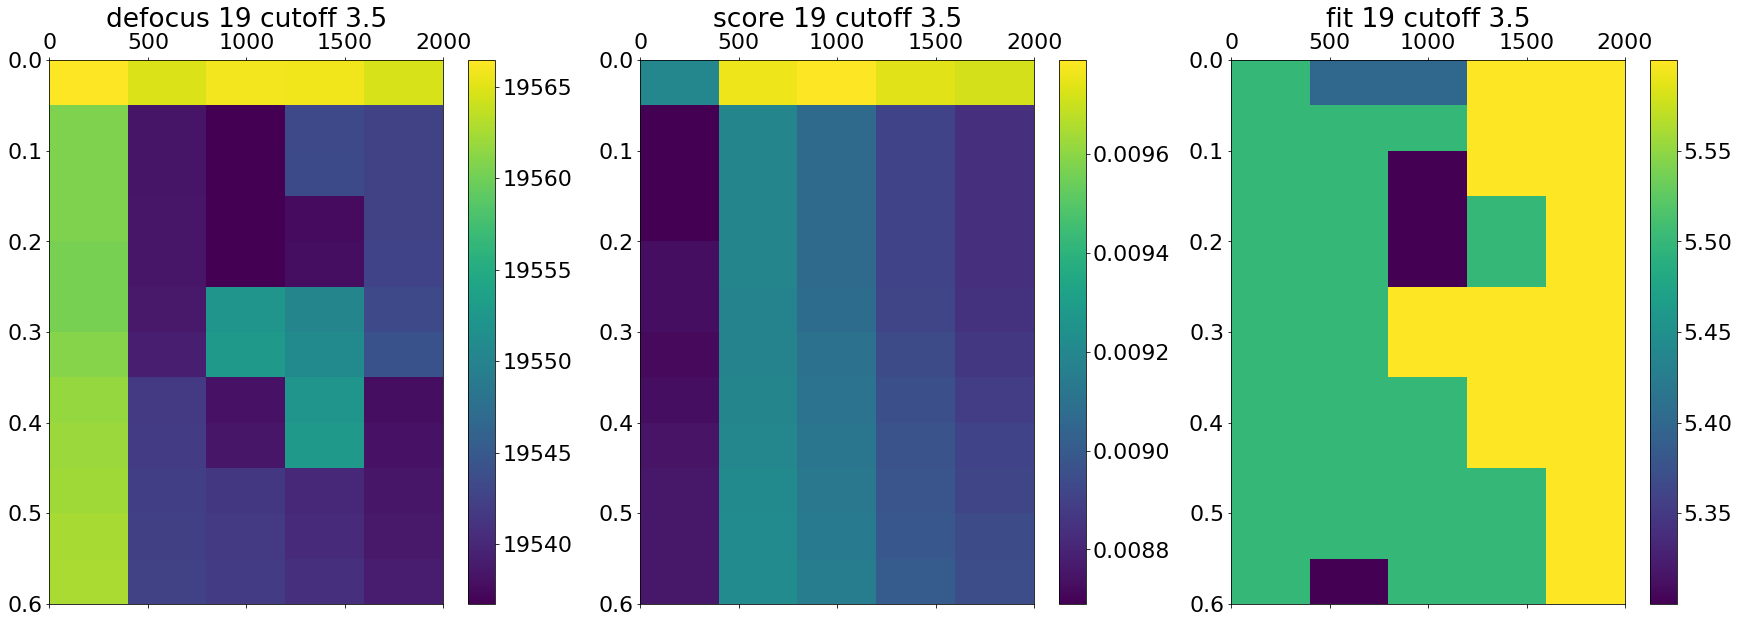

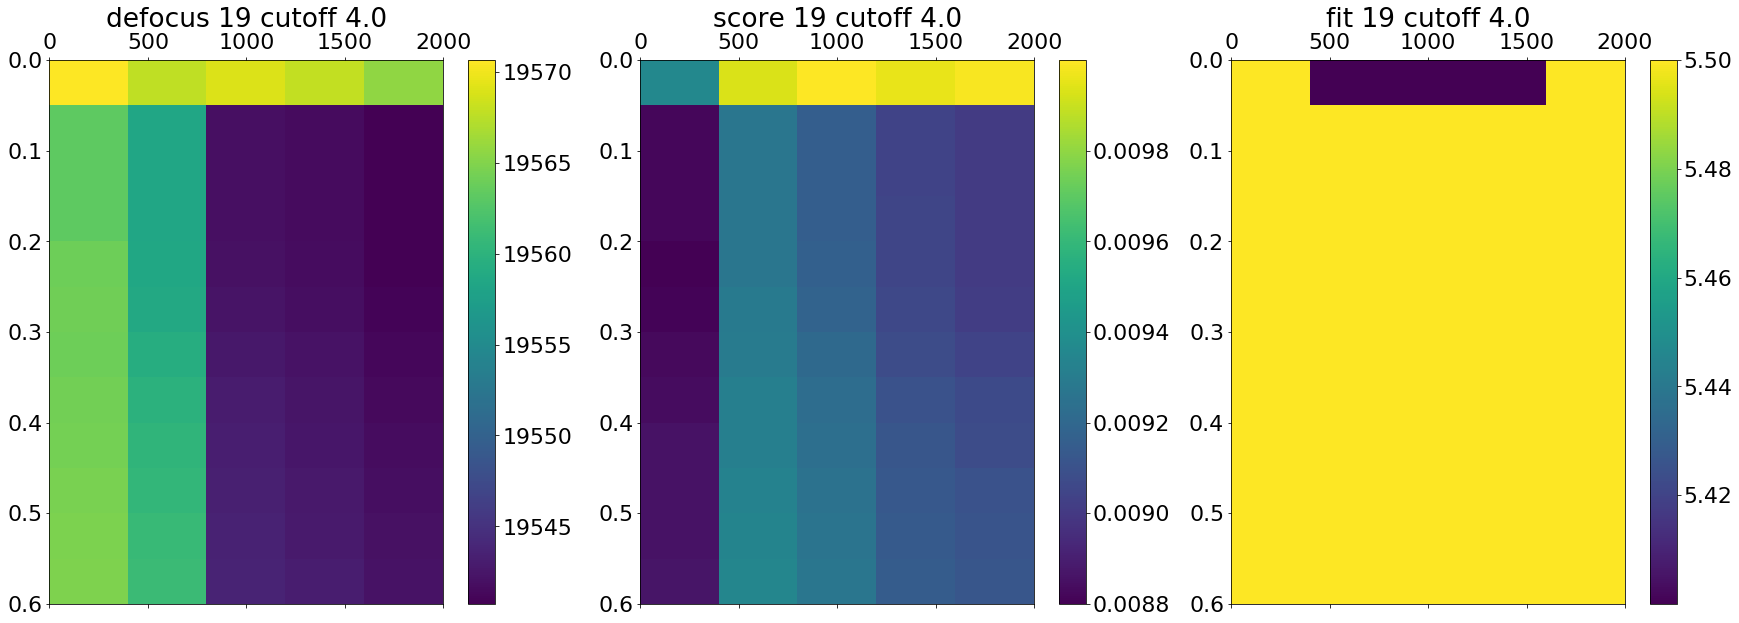

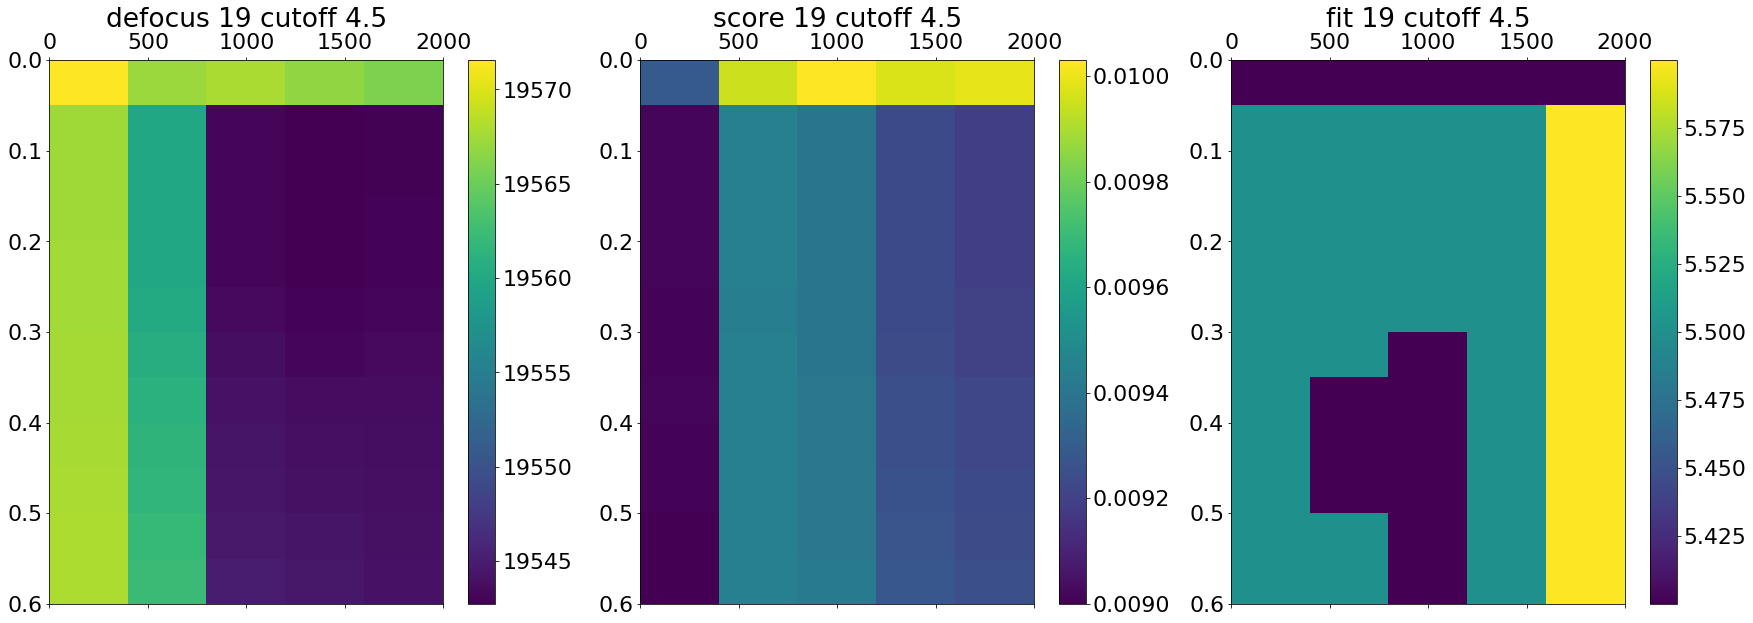

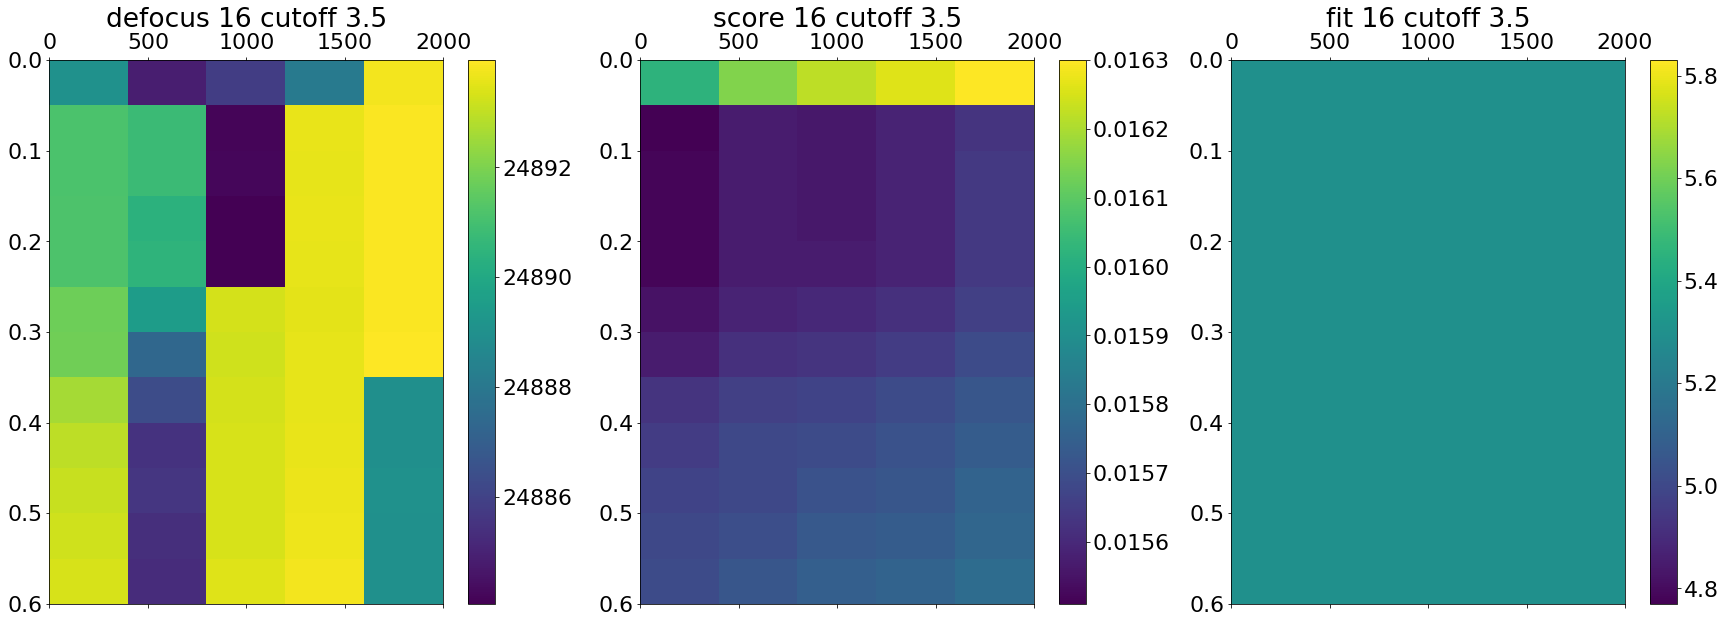

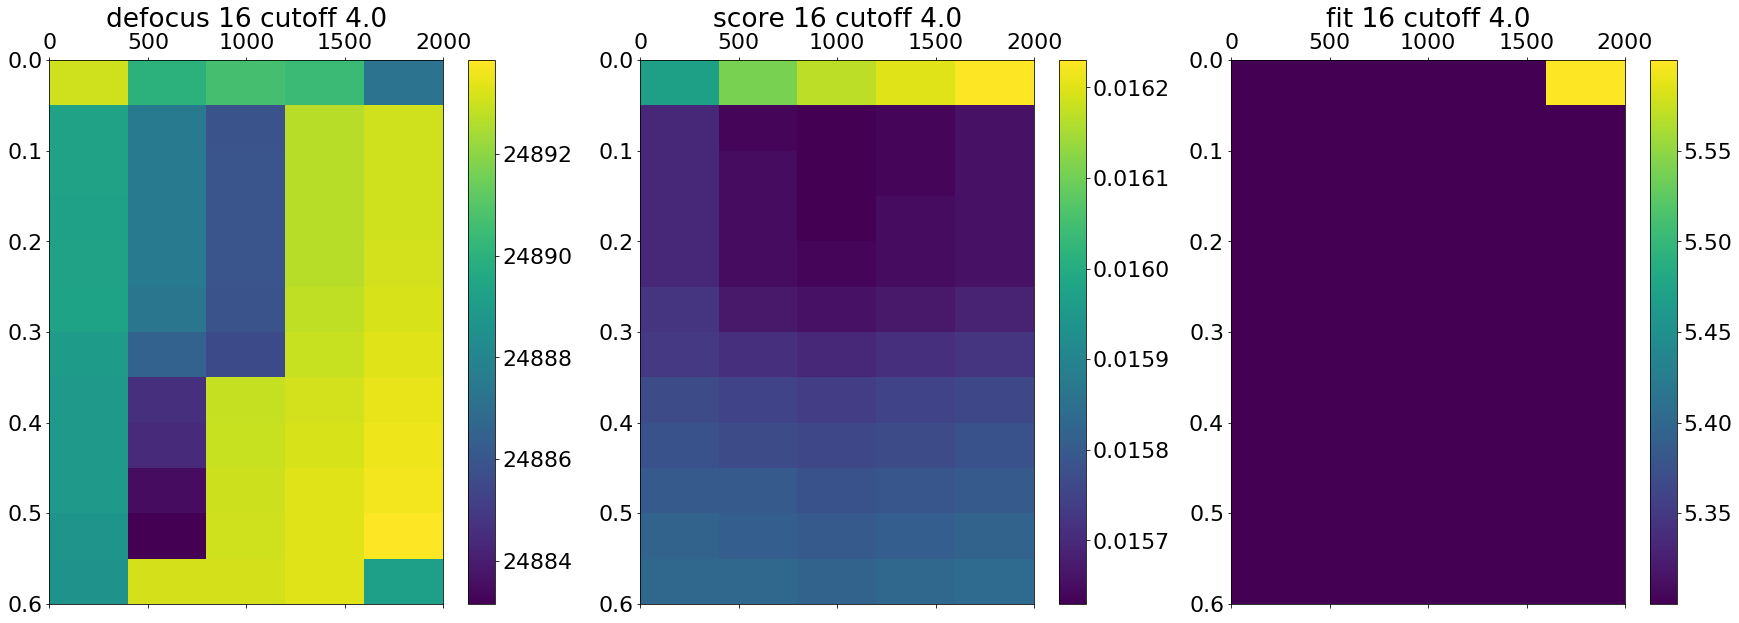

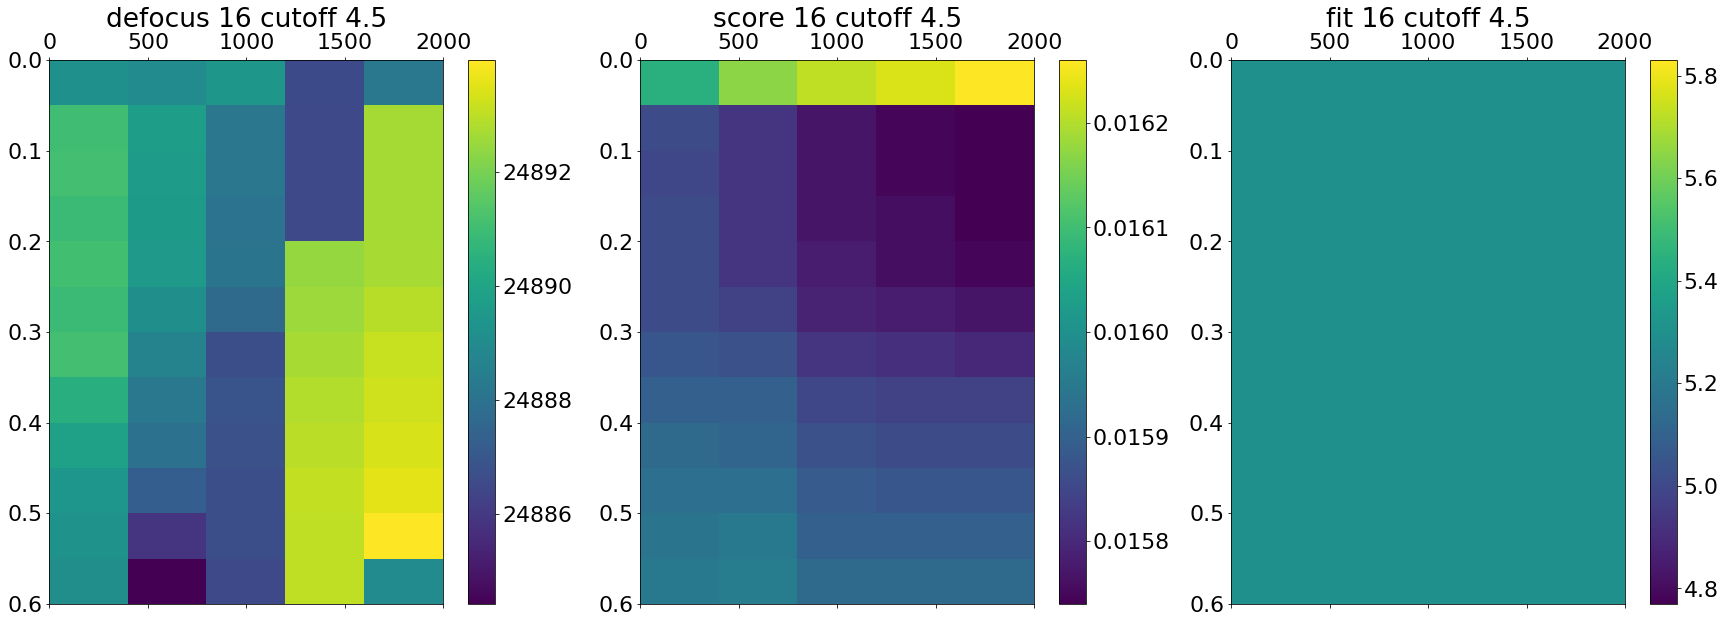

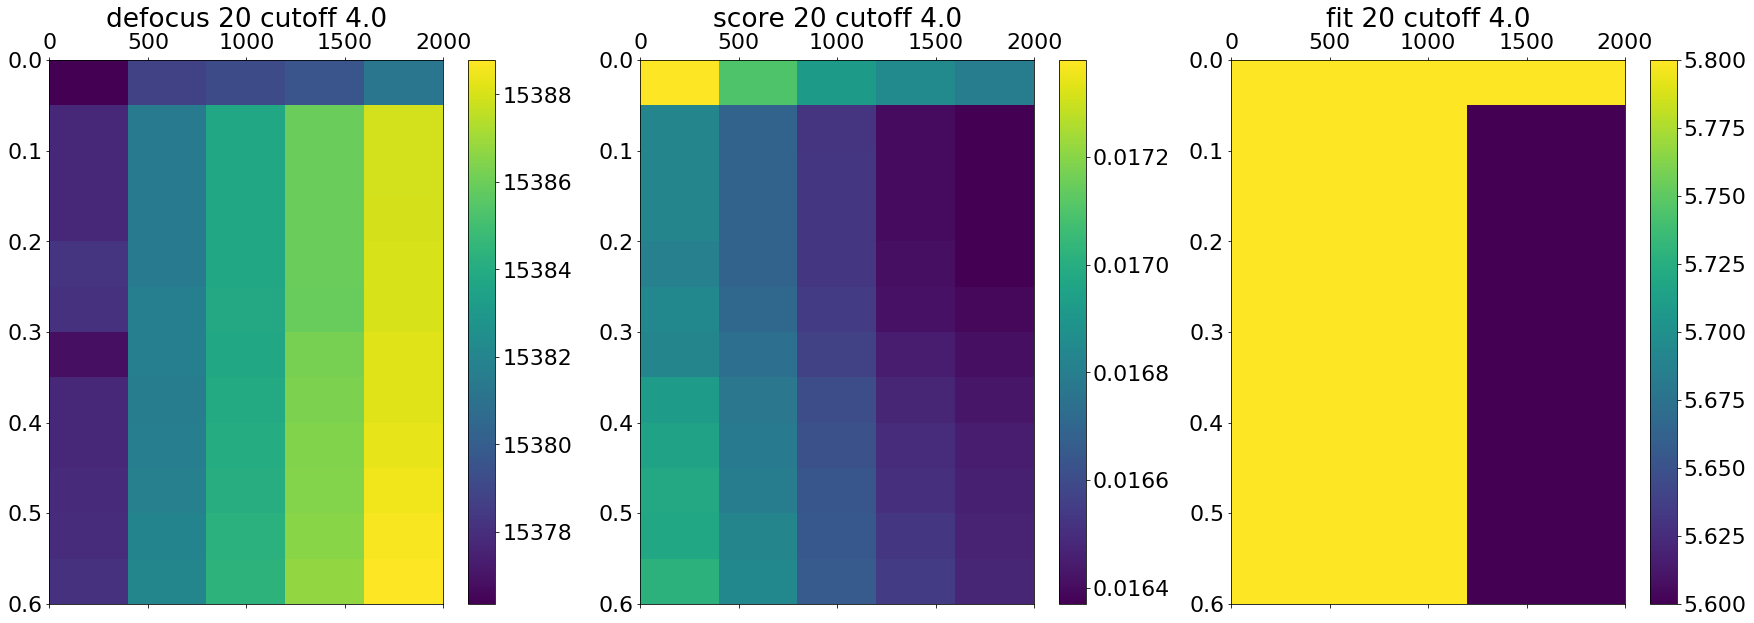

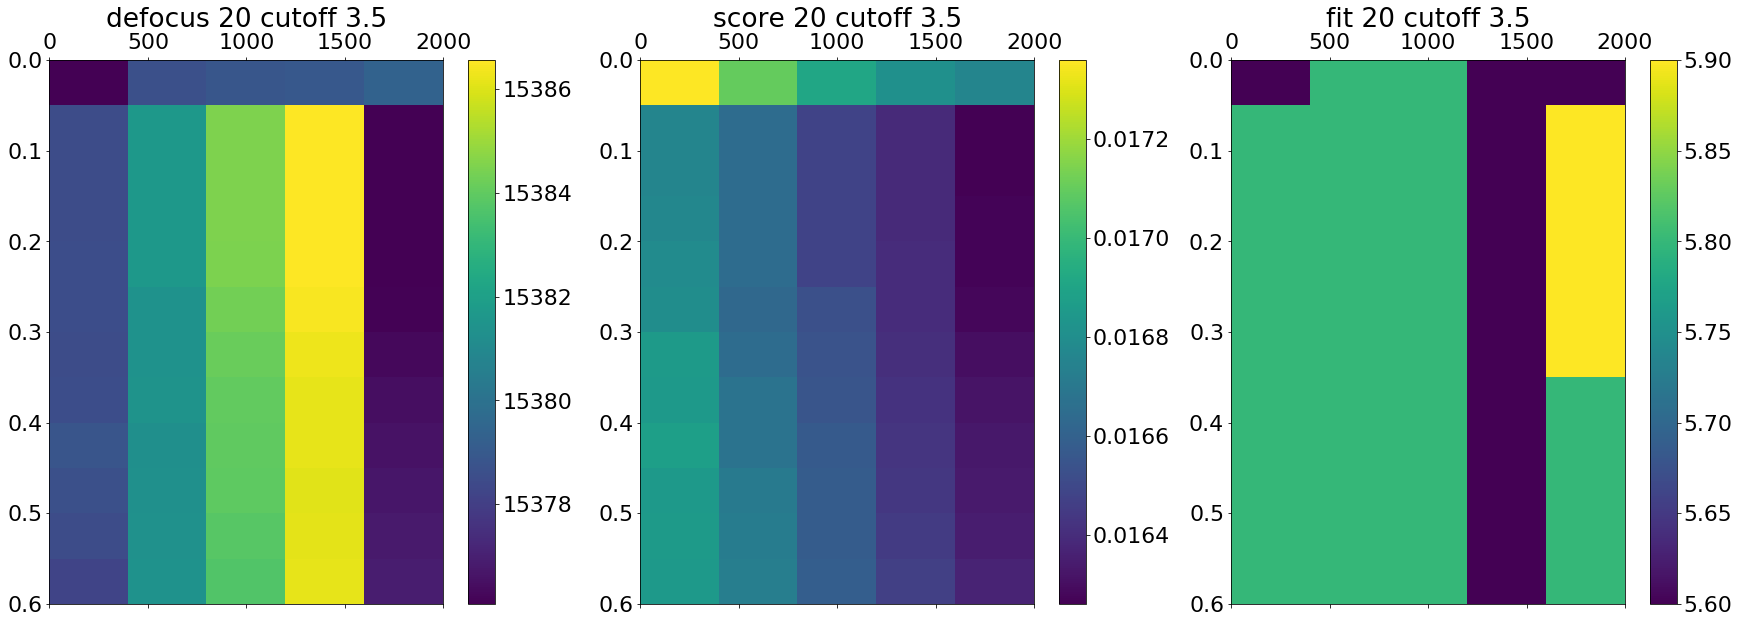

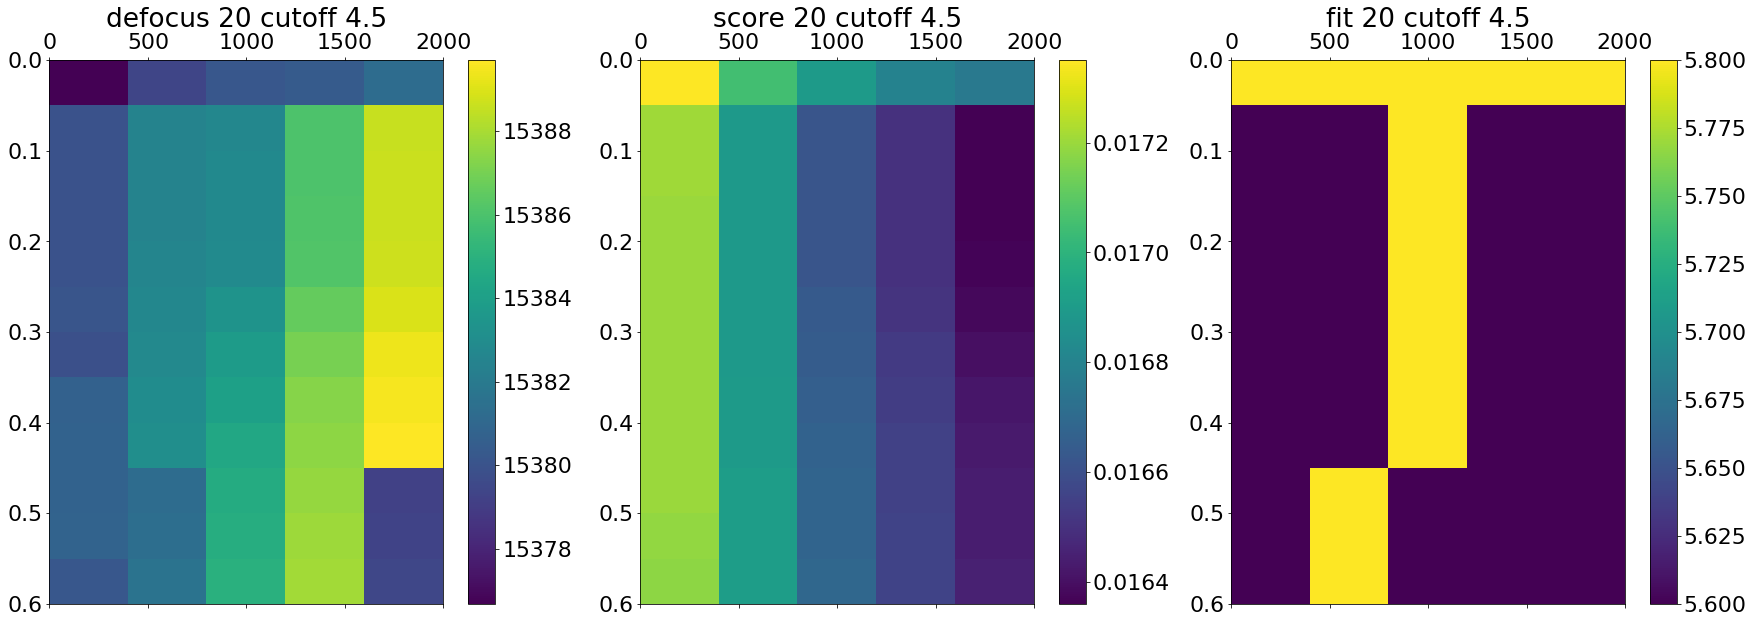

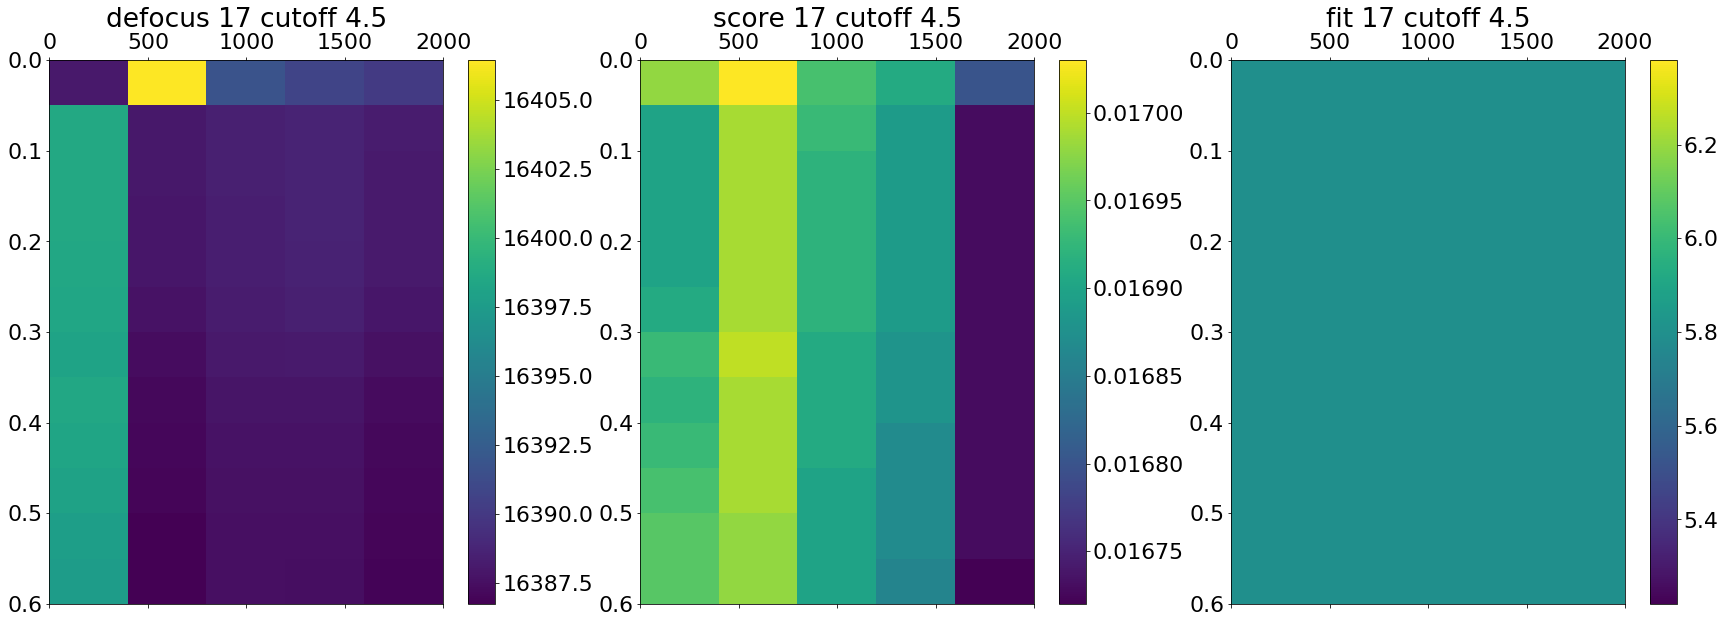

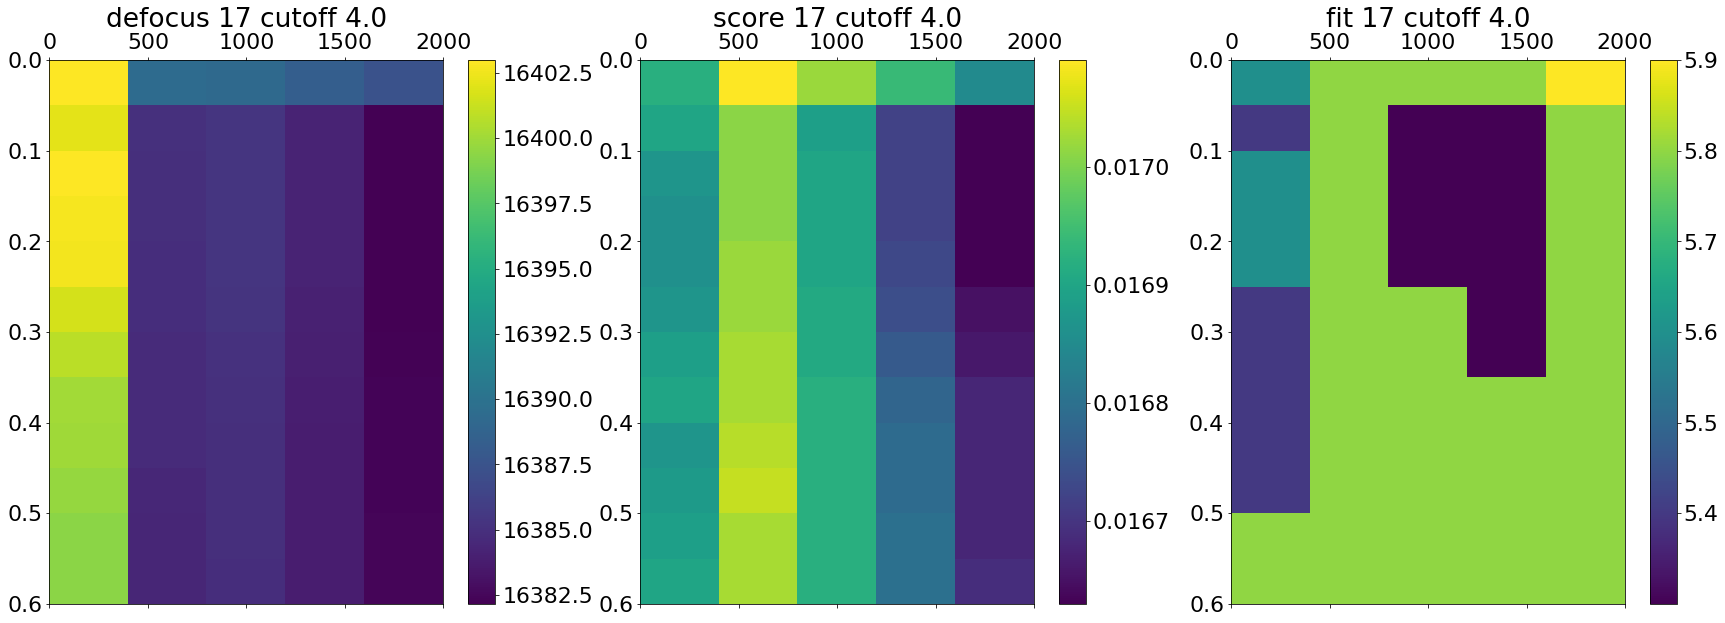

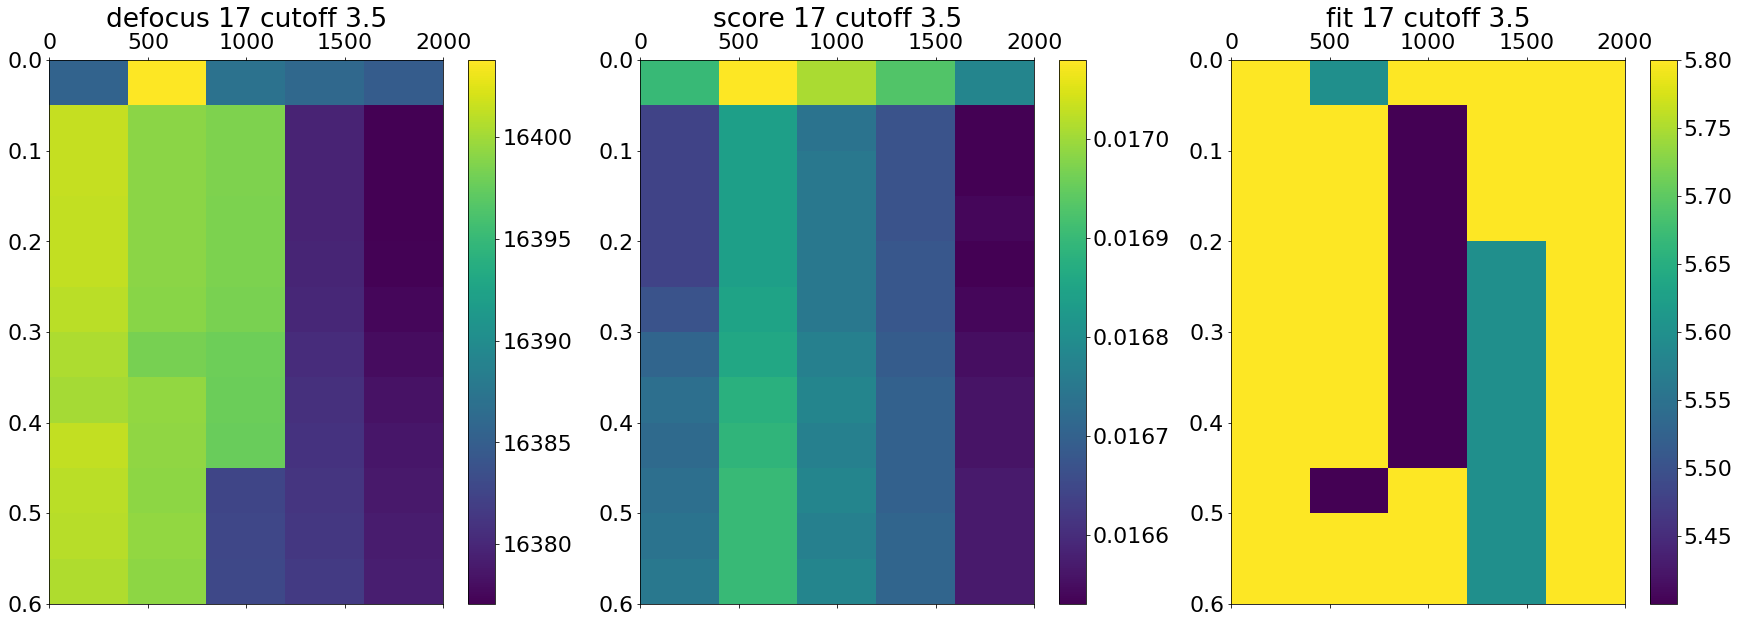

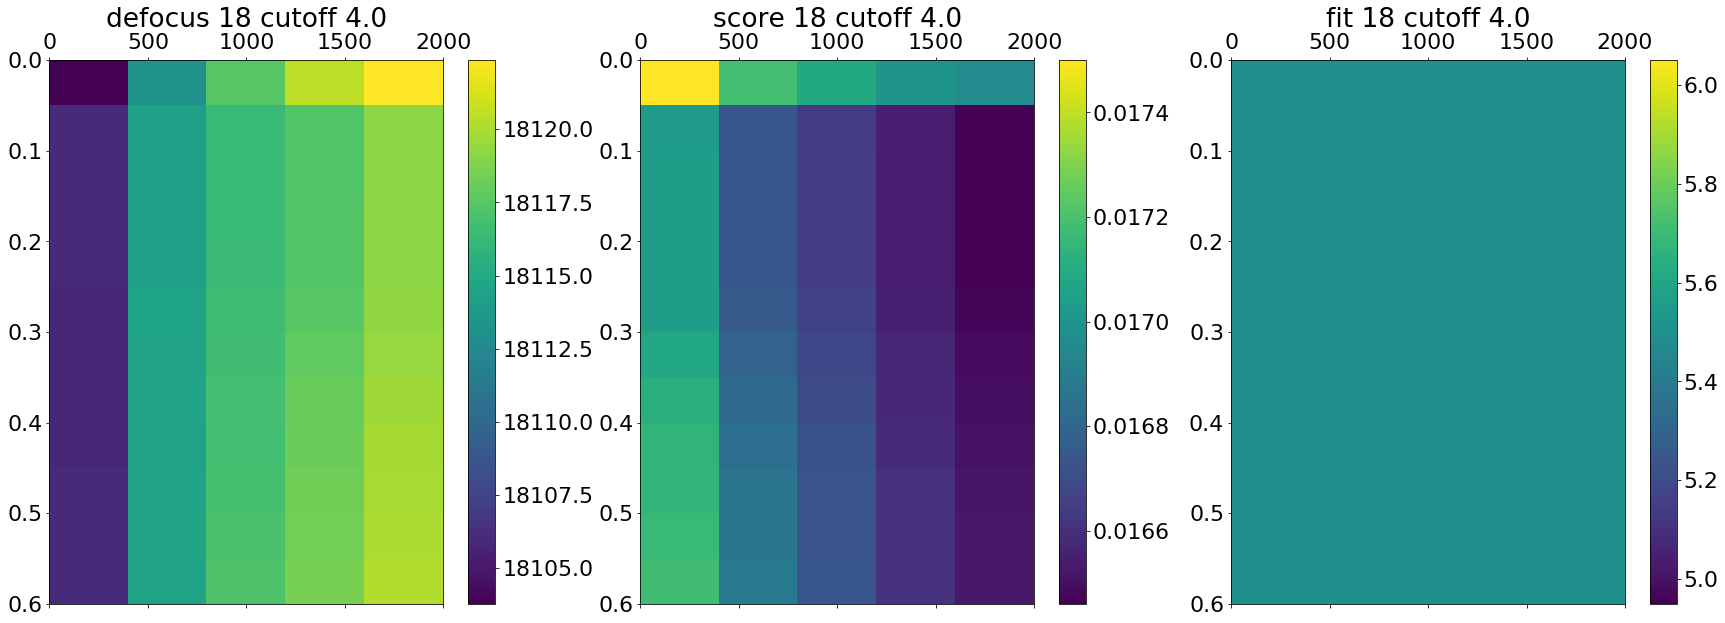

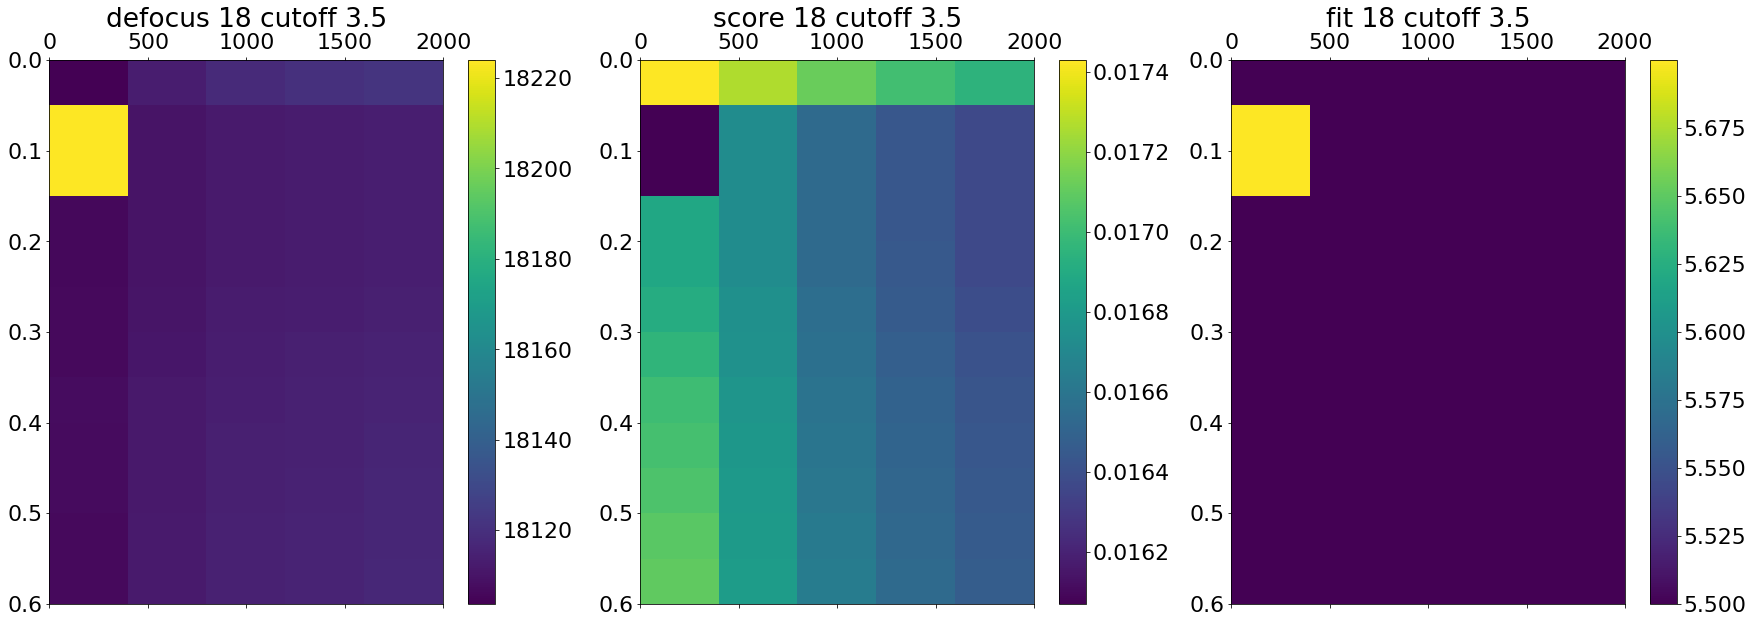

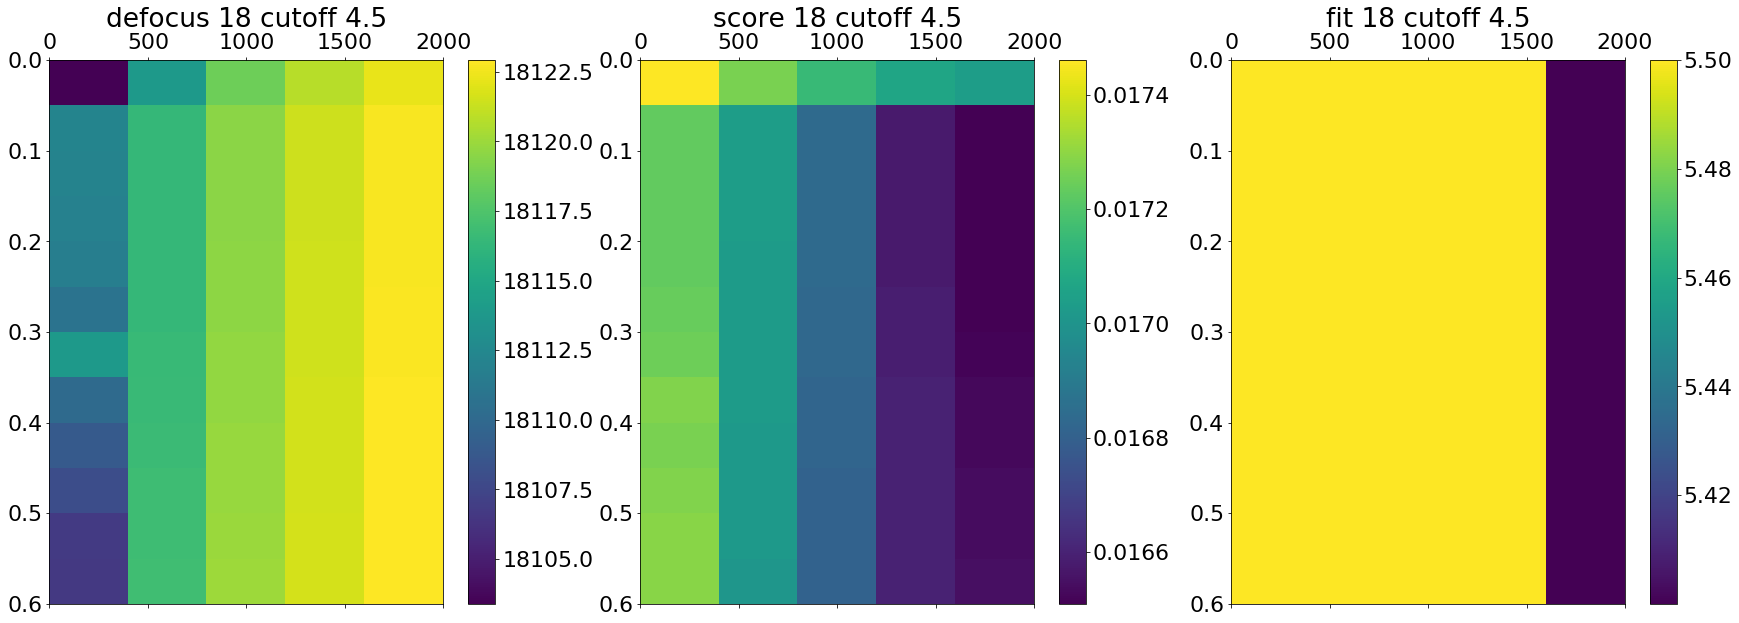

In [4]:
plt.rcParams.update({'font.size': 22})
j=1
for key in all_metrics.keys():
    print("getting interpolation type with", key)
    key_metrics = all_metrics[key]
#     print(key_metrics)
    for i,stack in enumerate(all_metrics[key].keys()):
        num = i+1
        print("getting interpolation stack", stack)

#         print("we are now at num", num)
#         print("key metrics")
#         print(key_metrics)
        stack_num = int(key.split('stack')[-1])
        curr_stack = key_metrics[stack]
        stack_metrics=np.array(curr_stack)
#         print("stack metrics")
#         print(stack_metrics)
        threshold_mul = sorted(set(stack_metrics.T[0]))
        print(threshold_mul)

        bfactors = sorted(set(stack_metrics.T[1]))
        print(bfactors)

        twoddefocus=[]
        twodscores=[]
        twodfit=[]
        scores=[]
        fit=[]
        for thres in threshold_mul:# all_metrics
            vals=np.array(list(filter(lambda x: x[0] == float(thres), stack_metrics)),dtype='float32')
            print(vals)
            order = vals[:,1].argsort()
        #     print(order)
        #     print(vals[order])
            twoddefocus.append(list(vals[order][:,2]))
            twodscores.append(list(vals[order][:,3]))
            twodfit.append(list(vals[order][:,4]))
            means=vals.mean(axis=0)
            scores.append(means[3])
            fit.append(means[4])
        #     print(vals[:,3])
        # print(twodscores)
        # print(twodfit)
        #     print(twodscores)
        extent = [min(bfactors), max(bfactors), max(threshold_mul), min(threshold_mul)]
        # all_metrics
        fig, axes = plt.subplots(1, 3,figsize=(30,10))
        #     fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

        # fig, ax = plt.subplots()
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes('right', size='5%', pad=0.05)

        mat = axes[0].matshow(twoddefocus,extent=extent,aspect='auto')
        axes[0].set_title('defocus {} cutoff {}'.format(stack_num, stack))
        fig.colorbar(mat,ax=axes[0])

        mat = axes[1].matshow(twodscores,extent=extent,aspect='auto')
        axes[1].set_title('score {} cutoff {}'.format(stack_num, stack))
        fig.colorbar(mat,ax=axes[1])

        mat = axes[2].matshow(twodfit,extent=extent,aspect='auto')
        axes[2].set_title('fit {} cutoff {}'.format(stack_num, stack))
        fig.colorbar(mat,ax=axes[2])